![](https://www.xenonstack.com/wp-content/uploads/xenonstack-credit-card-fraud-detection.png)

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from pathlib import Path
from statsmodels.stats.stattools import durbin_watson

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
pd.options.display.float_format = '{:.5f}'.format
sns.set()

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
data_folder = Path("data")
creditcard_file = data_folder / "creditcard.csv" 

In [3]:
data=pd.read_csv(creditcard_file)
pd.set_option('display.max_columns', 1000)
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,0.09079,-0.55160,-0.61780,-0.99139,-0.31117,1.46818,-0.47040,0.20797,0.02579,0.40399,0.25141,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,-0.16697,1.61273,1.06524,0.48910,-0.14377,0.63556,0.46392,-0.11480,-0.18336,-0.14578,-0.06908,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,0.20764,0.62450,0.06608,0.71729,-0.16595,2.34586,-2.89008,1.10997,-0.12136,-2.26186,0.52498,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,-0.05495,-0.22649,0.17823,0.50776,-0.28792,-0.63142,-1.05965,-0.68409,1.96578,-1.23262,-0.20804,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,0.75307,-0.82284,0.53820,1.34585,-1.11967,0.17512,-0.45145,-0.23703,-0.03819,0.80349,0.40854,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0
5,2.00000,-0.42597,0.96052,1.14111,-0.16825,0.42099,-0.02973,0.47620,0.26031,-0.56867,-0.37141,1.34126,0.35989,-0.35809,-0.13713,0.51762,0.40173,-0.05813,0.06865,-0.03319,0.08497,-0.20825,-0.55982,-0.02640,-0.37143,-0.23279,0.10591,0.25384,0.08108,3.67000,0
6,4.00000,1.22966,0.14100,0.04537,1.20261,0.19188,0.27271,-0.00516,0.08121,0.46496,-0.09925,-1.41691,-0.15383,-0.75106,0.16737,0.05014,-0.44359,0.00282,-0.61199,-0.04558,-0.21963,-0.16772,-0.27071,-0.15410,-0.78006,0.75014,-0.25724,0.03451,0.00517,4.99000,0
7,7.00000,-0.64427,1.41796,1.07438,-0.49220,0.94893,0.42812,1.12063,-3.80786,0.61537,1.24938,-0.61947,0.29147,1.75796,-1.32387,0.68613,-0.07613,-1.22213,-0.35822,0.32450,-0.15674,1.94347,-1.01545,0.05750,-0.64971,-0.41527,-0.05163,-1.20692,-1.08534,40.80000,0
8,7.00000,-0.89429,0.28616,-0.11319,-0.27153,2.66960,3.72182,0.37015,0.85108,-0.39205,-0.41043,-0.70512,-0.11045,-0.28625,0.07436,-0.32878,-0.21008,-0.49977,0.11876,0.57033,0.05274,-0.07343,-0.26809,-0.20423,1.01159,0.37320,-0.38416,0.01175,0.14240,93.20000,0
9,9.00000,-0.33826,1.11959,1.04437,-0.22219,0.49936,-0.24676,0.65158,0.06954,-0.73673,-0.36685,1.01761,0.83639,1.00684,-0.44352,0.15022,0.73945,-0.54098,0.47668,0.45177,0.20371,-0.24691,-0.63375,-0.12079,-0.38505,-0.06973,0.09420,0.24622,0.08308,3.68000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000,284807.00000
mean,94813.85958,0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,88.34962,0.00173
std,47488.14595,1.95870,1.65131,1.51626,1.41587,1.38025,1.33227,1.23709,1.19435,1.09863,1.08885,1.02071,0.99920,0.99527,0.95860,0.91532,0.87625,0.84934,0.83818,0.81404,0.77093,0.73452,0.72570,0.62446,0.60565,0.52128,0.48223,0.40363,0.33008,250.12011,0.04153
min,0.00000,-56.40751,-72.71573,-48.32559,-5.68317,-113.74331,-26.16051,-43.55724,-73.21672,-13.43407,-24.58826,-4.79747,-18.68371,-5.79188,-19.21433,-4.49894,-14.12985,-25.16280,-9.49875,-7.21353,-54.49772,-34.83038,-10.93314,-44.80774,-2.83663,-10.29540,-2.60455,-22.56568,-15.43008,0.00000,0.00000
25%,54201.50000,-0.92037,-0.59855,-0.89036,-0.84864,-0.69160,-0.76830,-0.55408,-0.20863,-0.64310,-0.53543,-0.76249,-0.40557,-0.64854,-0.42557,-0.58288,-0.46804,-0.48375,-0.49885,-0.45630,-0.21172,-0.22839,-0.54235,-0.16185,-0.35459,-0.31715,-0.32698,-0.07084,-0.05296,5.60000,0.00000
50%,84692.00000,0.01811,0.06549,0.17985,-0.01985,-0.05434,-0.27419,0.04010,0.02236,-0.05143,-0.09292,-0.03276,0.14003,-0.01357,0.05060,0.04807,0.06641,-0.06568,-0.00364,0.00373,-0.06248,-0.02945,0.00678,-0.01119,0.04098,0.01659,-0.05214,0.00134,0.01124,22.00000,0.00000
75%,139320.50000,1.31564,0.80372,1.02720,0.74334,0.61193,0.39856,0.57044,0.32735,0.59714,0.45392,0.73959,0.61824,0.66250,0.49315,0.64882,0.52330,0.39967,0.50081,0.45895,0.13304,0.18638,0.52855,0.14764,0.43953,0.35072,0.24095,0.09105,0.07828,77.16500,0.00000
max,172792.00000,2.45493,22.05773,9.38256,16.87534,34.80167,73.30163,120.58949,20.00721,15.59499,23.74514,12.01891,7.84839,7.12688,10.52677,8.87774,17.31511,9.25353,5.04107,5.59197,39.42090,27.20284,10.50309,22.52841,4.58455,7.51959,3.51735,31.61220,33.84781,25691.16000,1.00000


In [6]:
data["count"]=np.ones(284807)
pd.pivot_table(data, columns=["Class"],values="count",aggfunc=np.sum)

Class,0,1
count,284315.00000,492.00000


The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions

In [7]:
data.drop("count",axis=1,inplace=True)


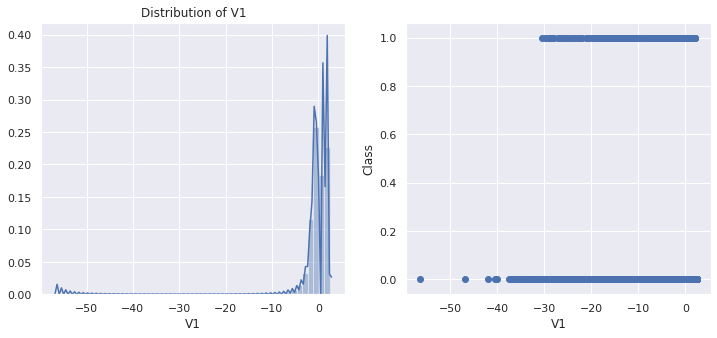

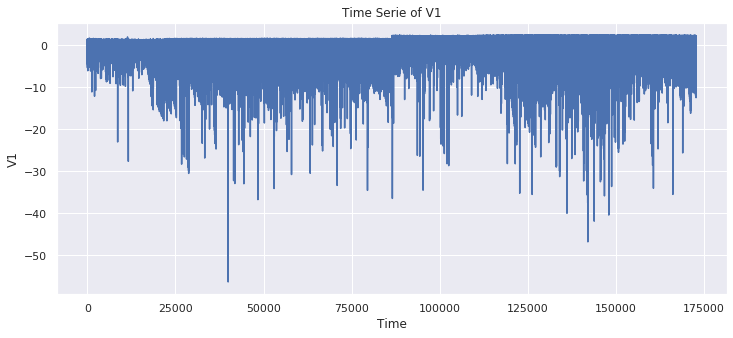

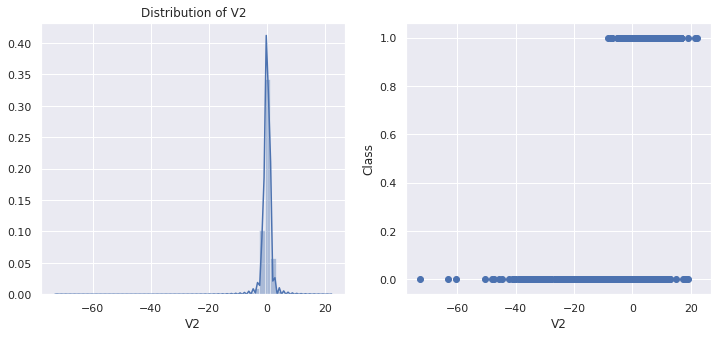

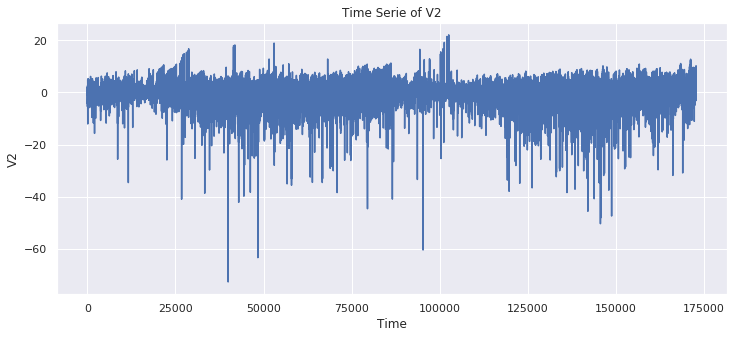

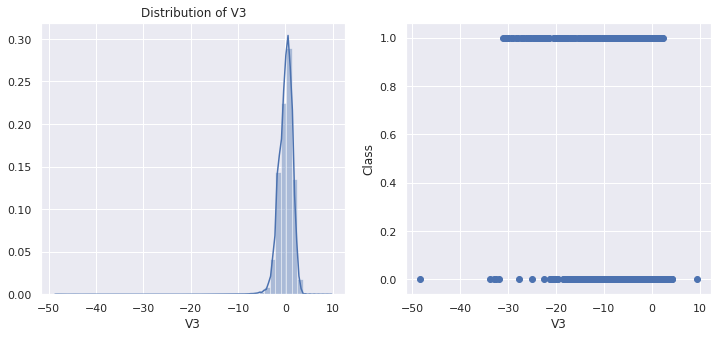

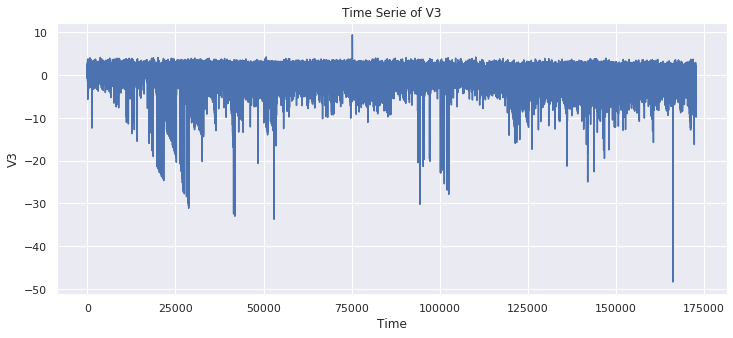

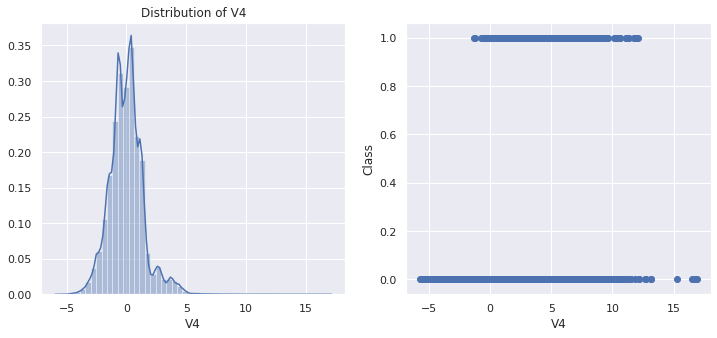

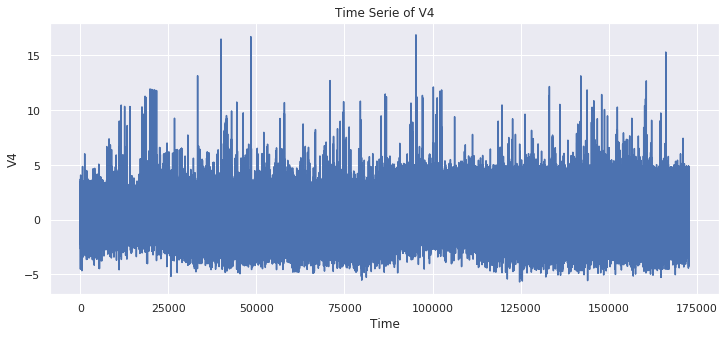

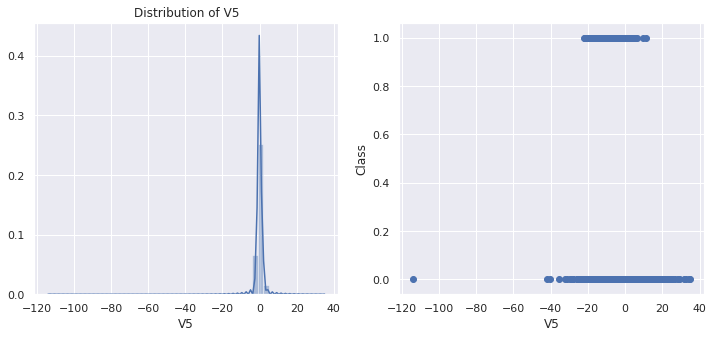

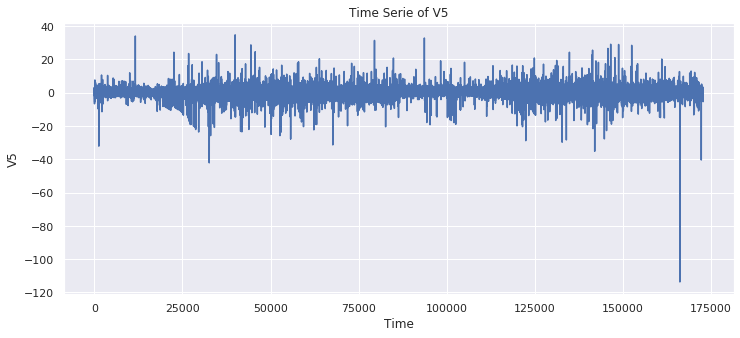

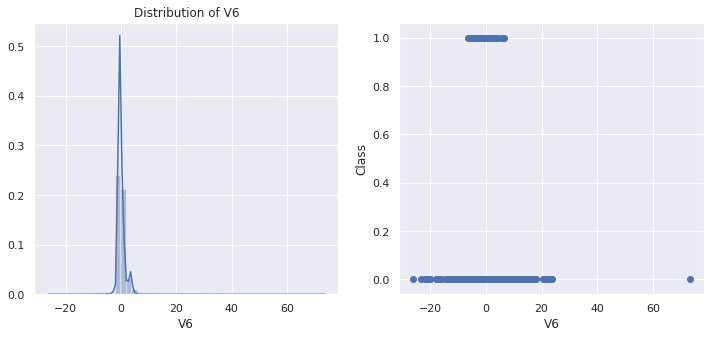

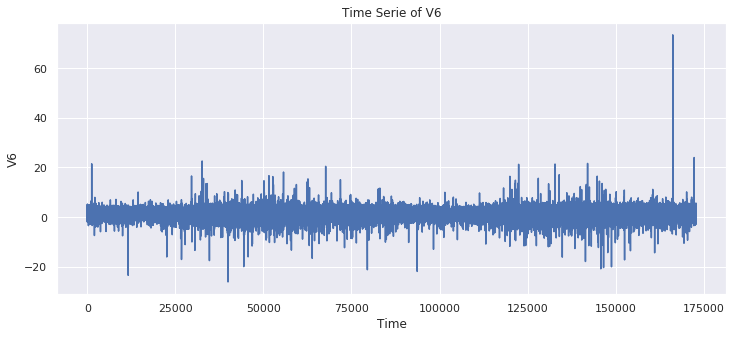

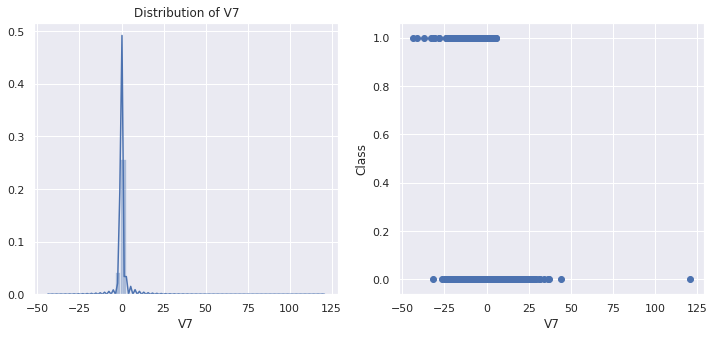

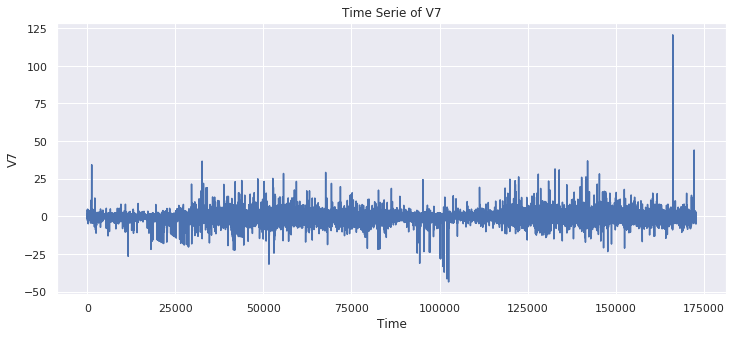

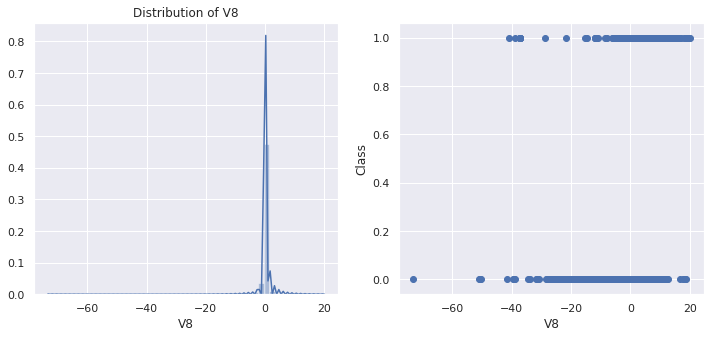

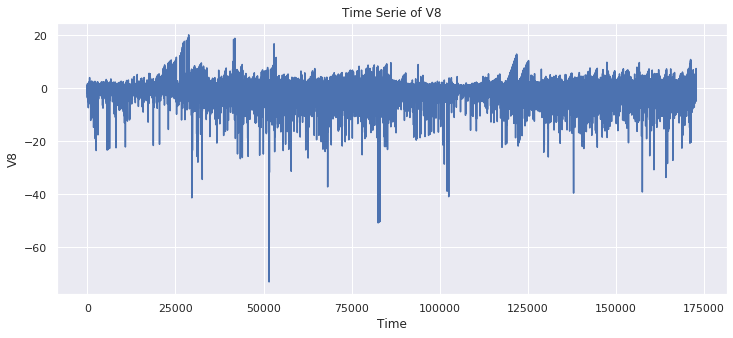

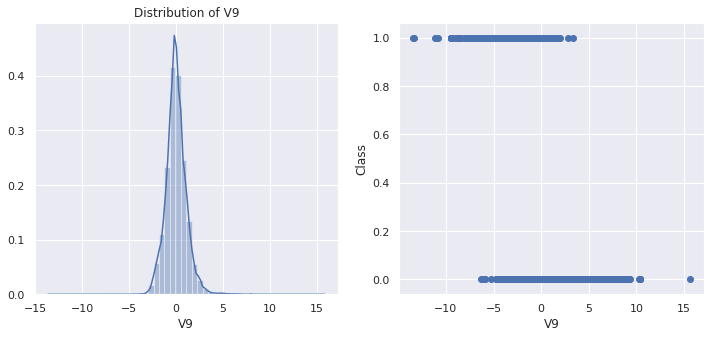

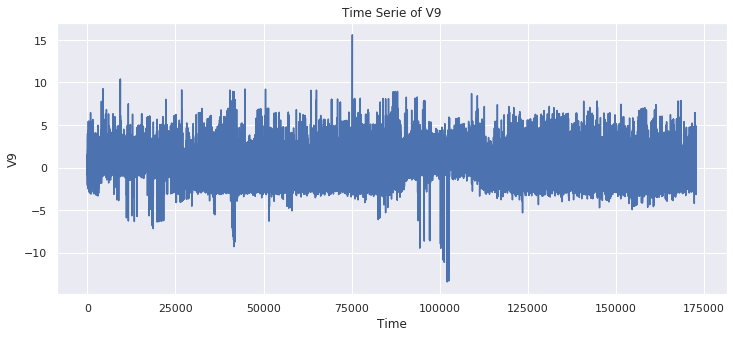

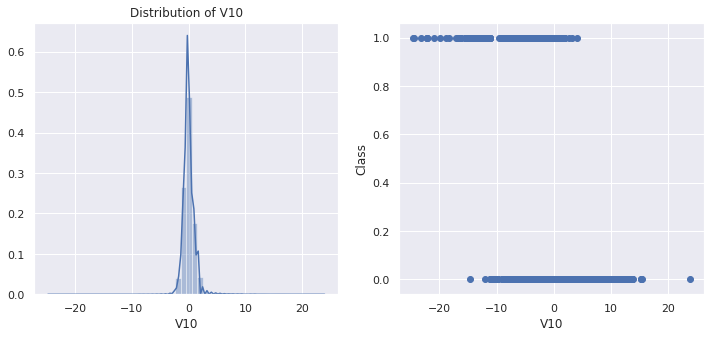

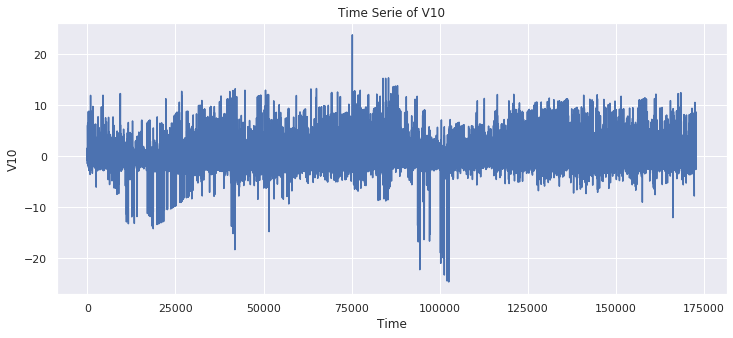

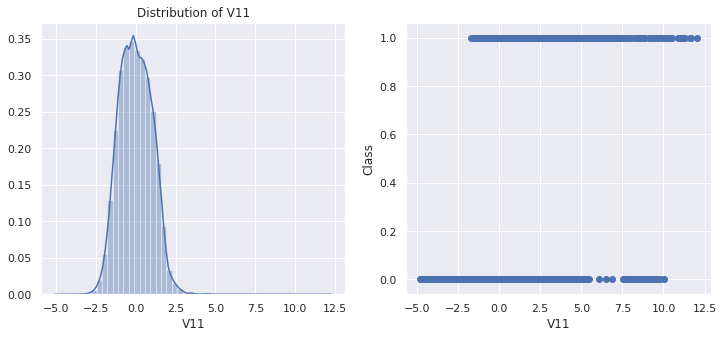

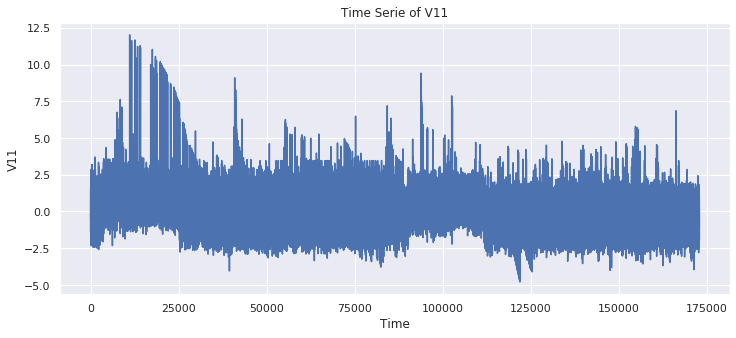

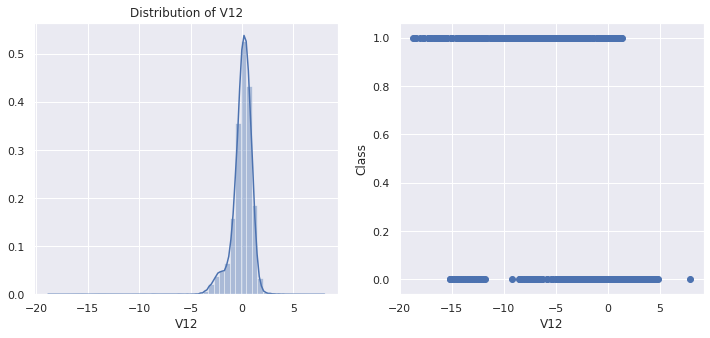

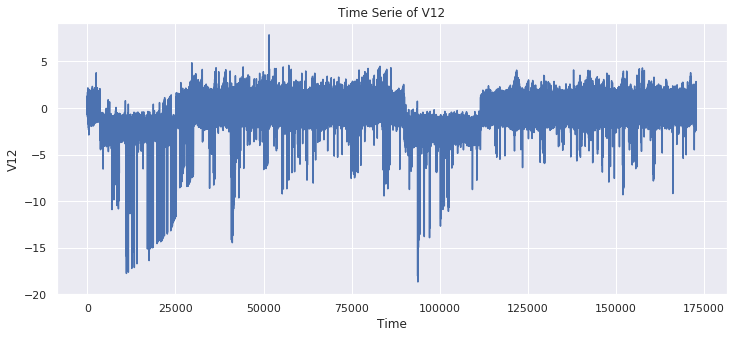

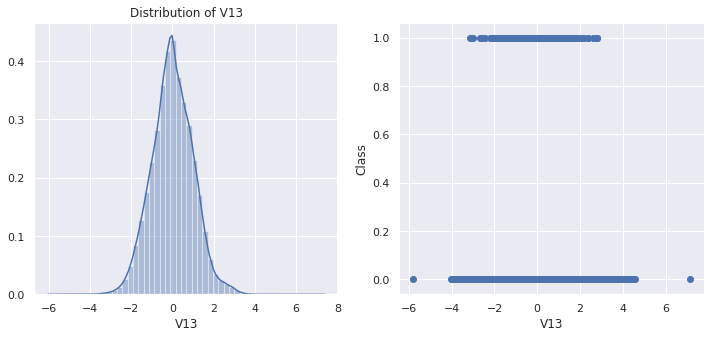

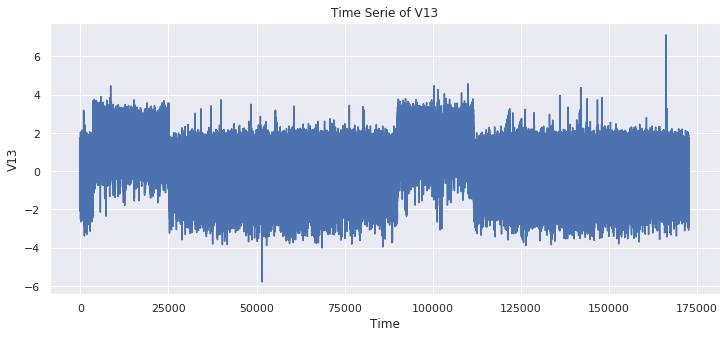

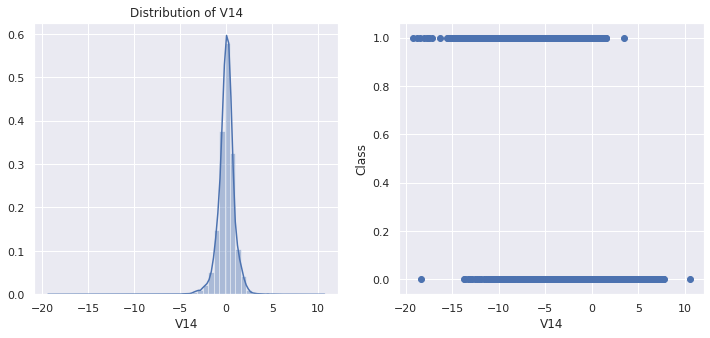

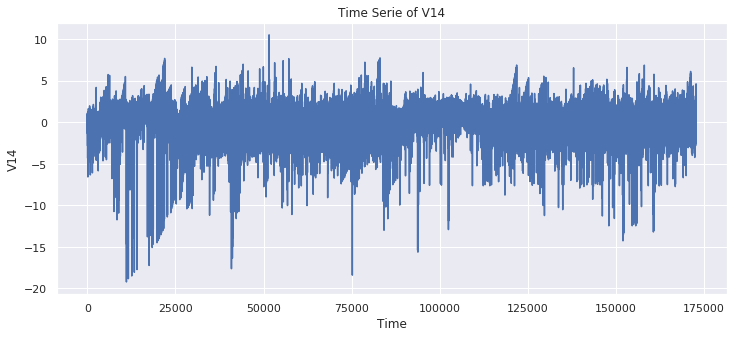

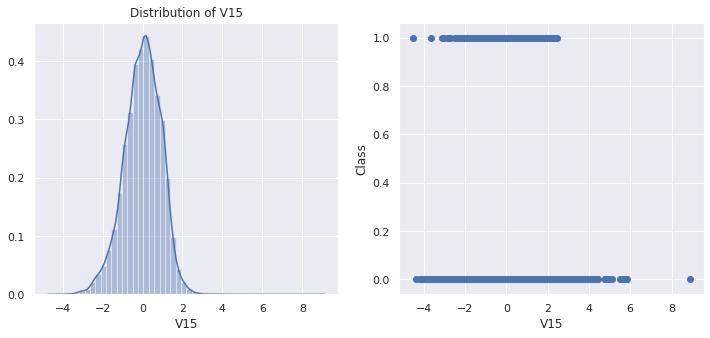

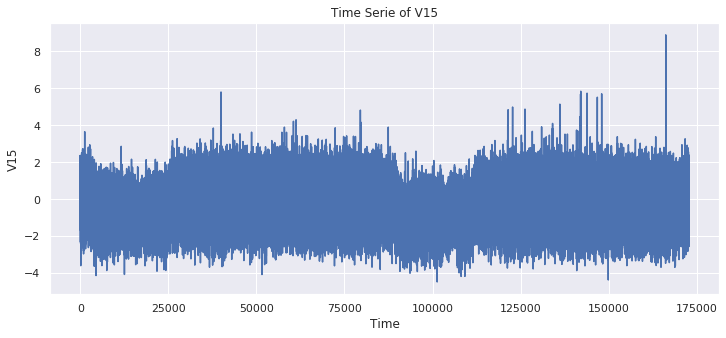

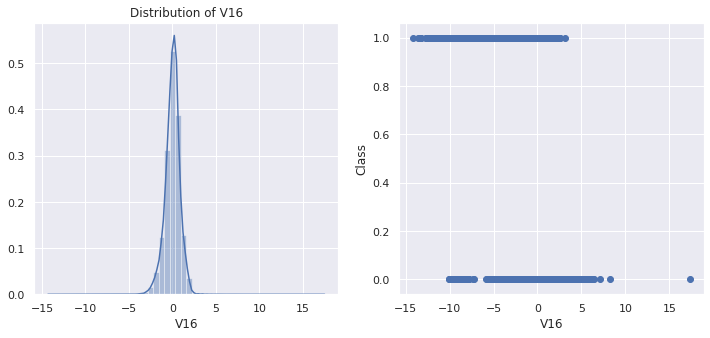

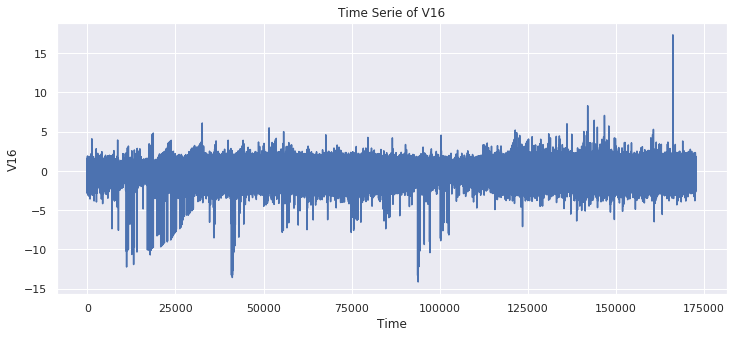

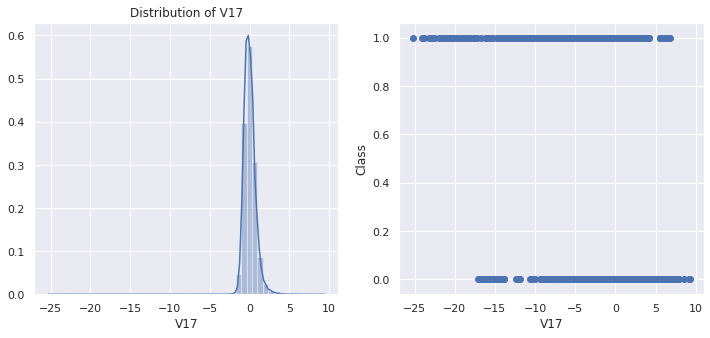

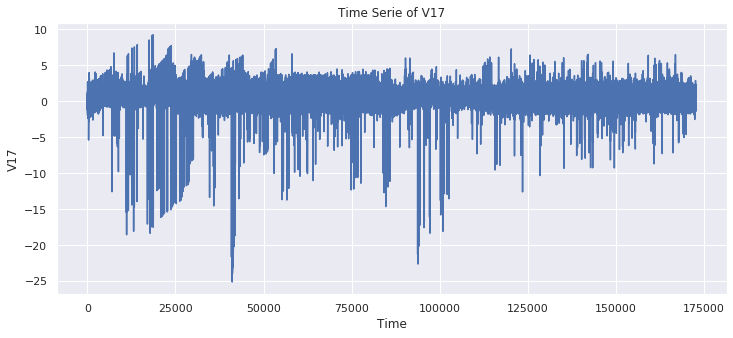

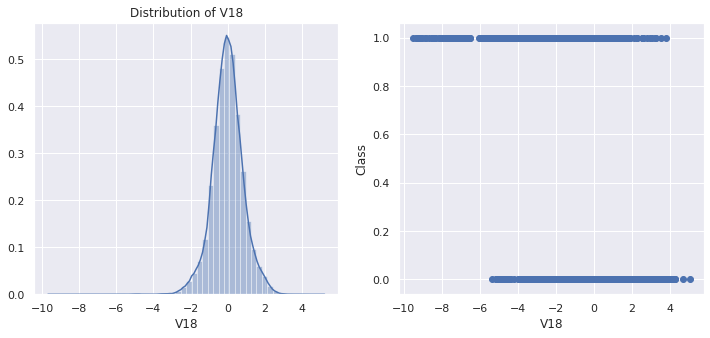

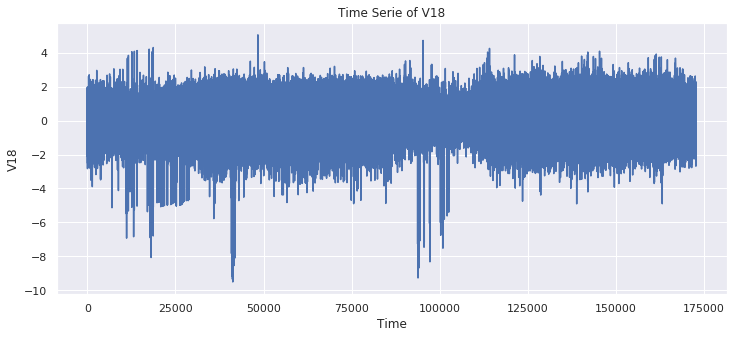

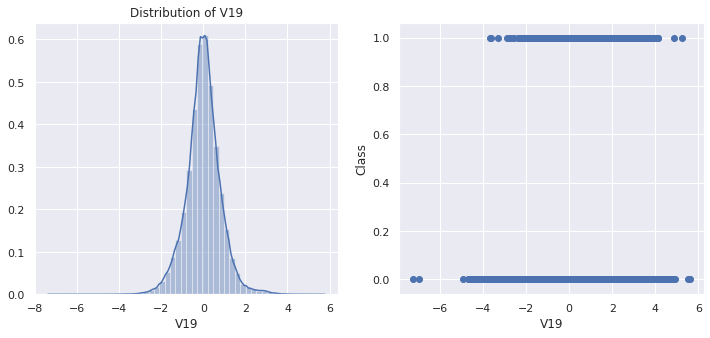

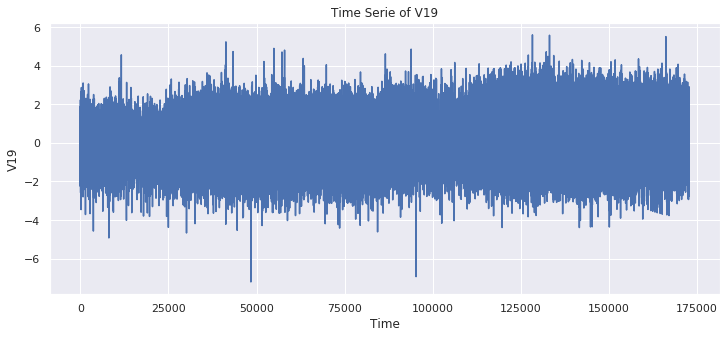

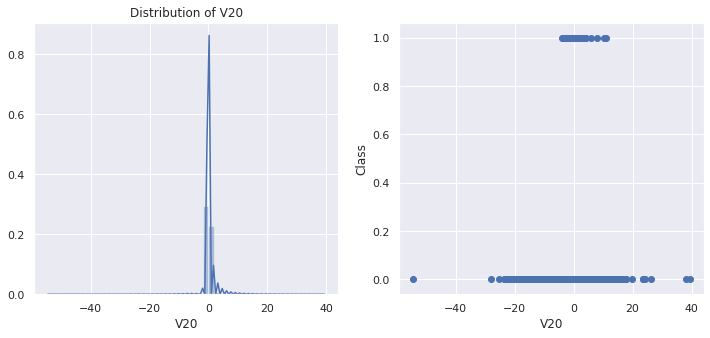

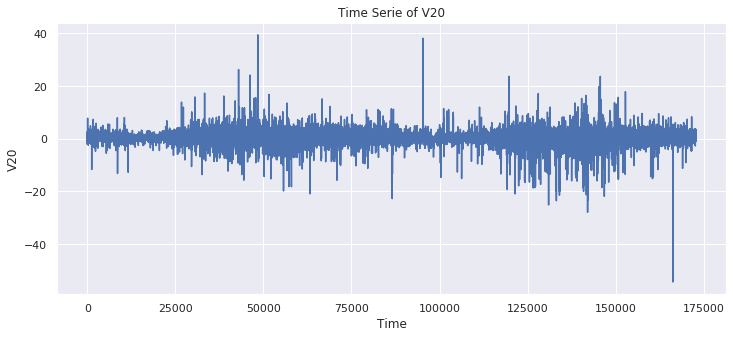

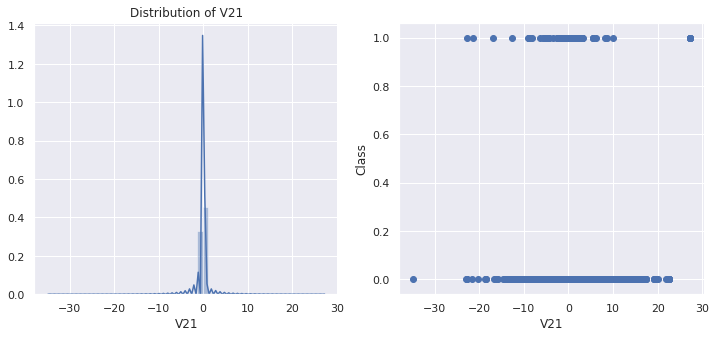

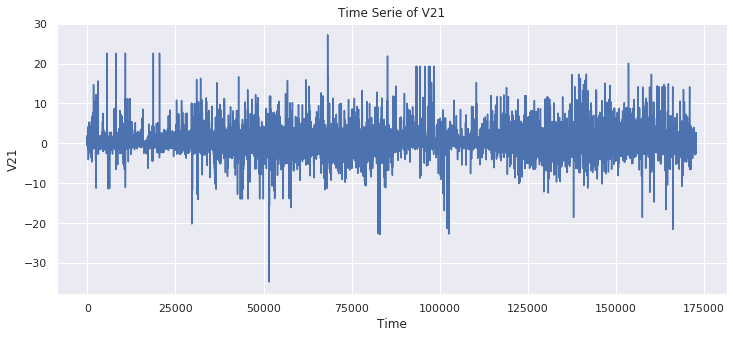

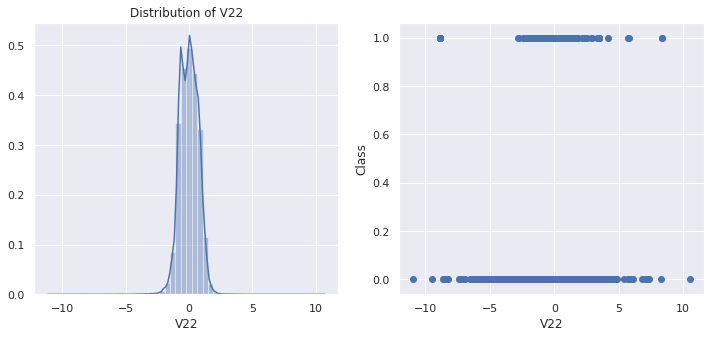

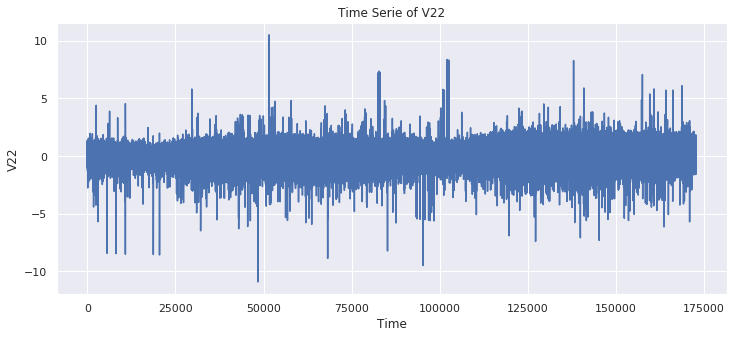

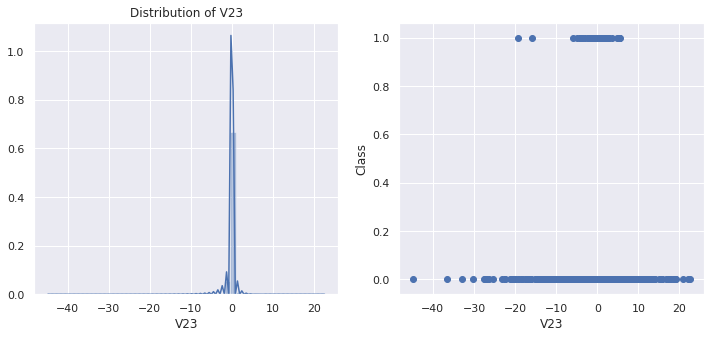

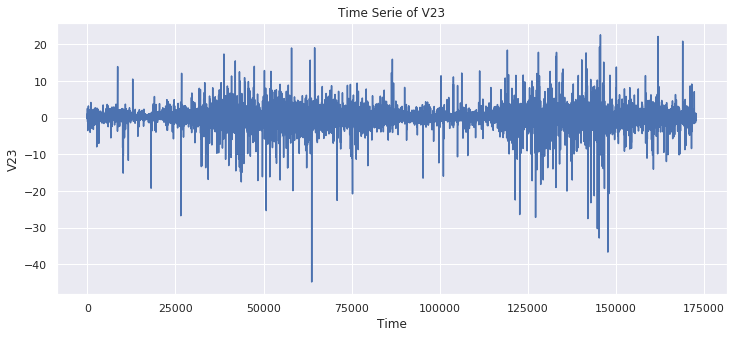

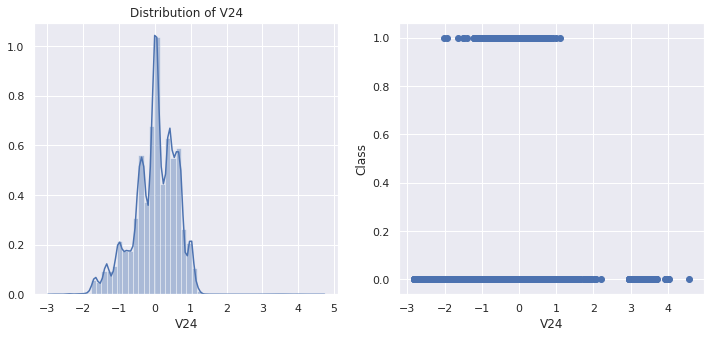

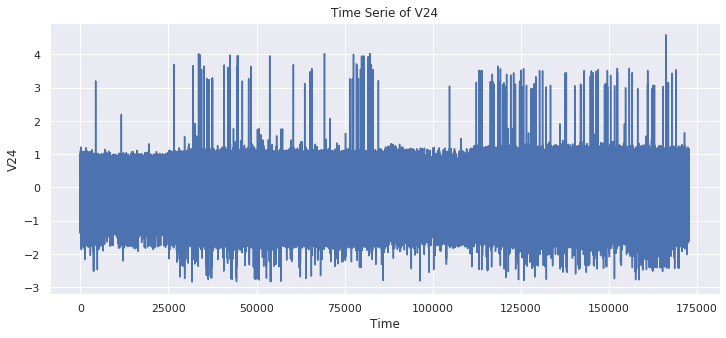

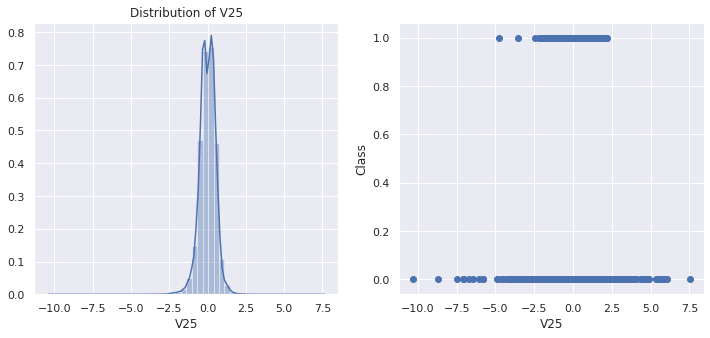

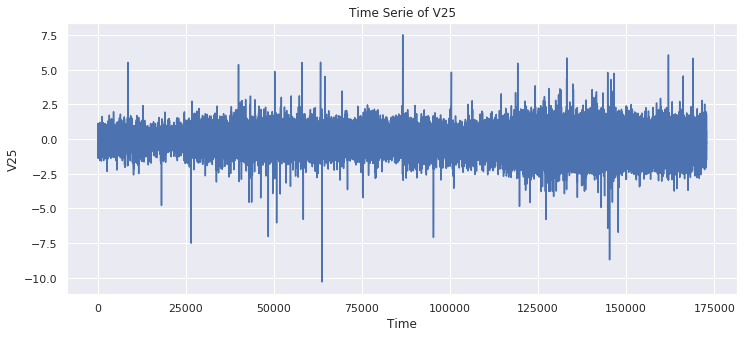

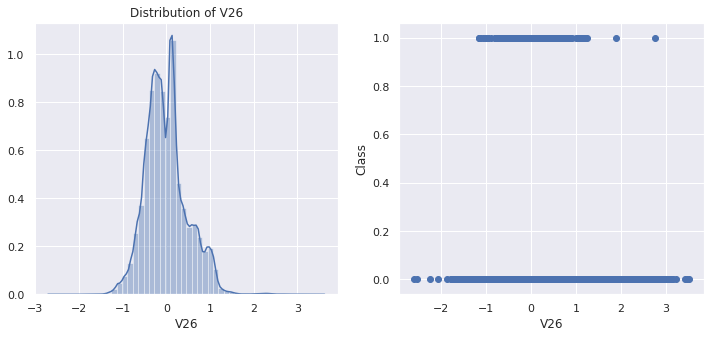

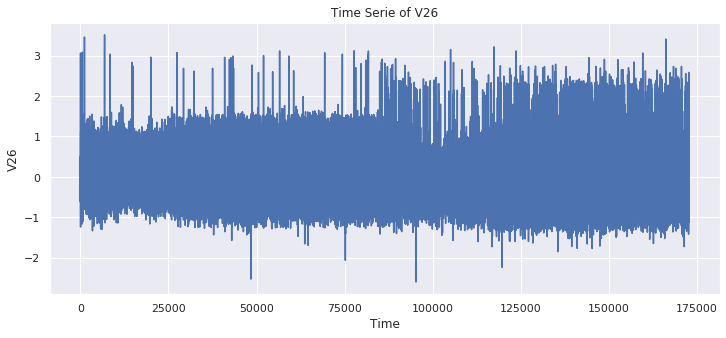

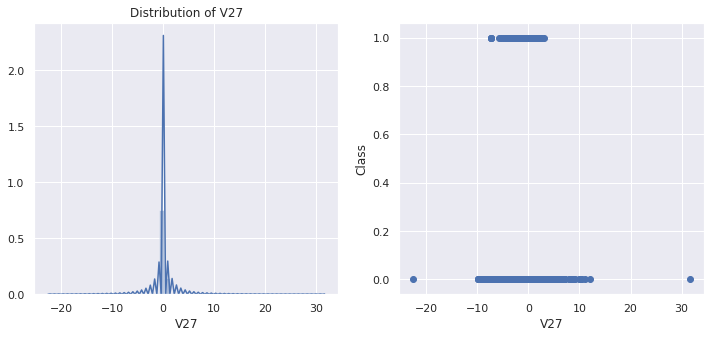

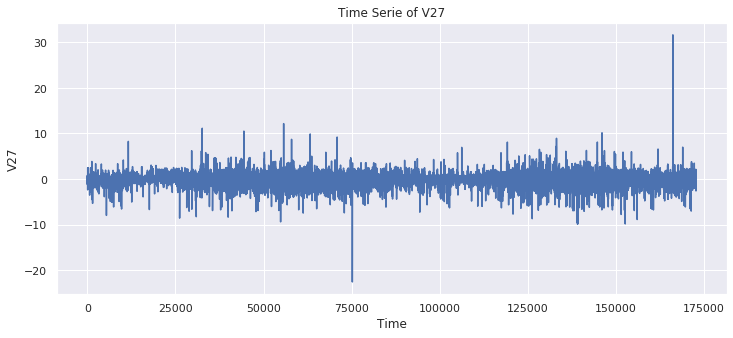

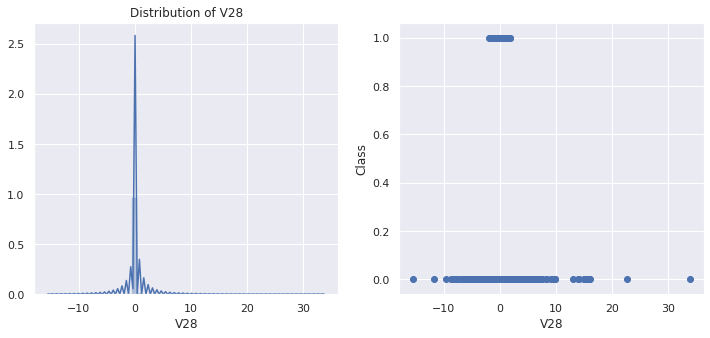

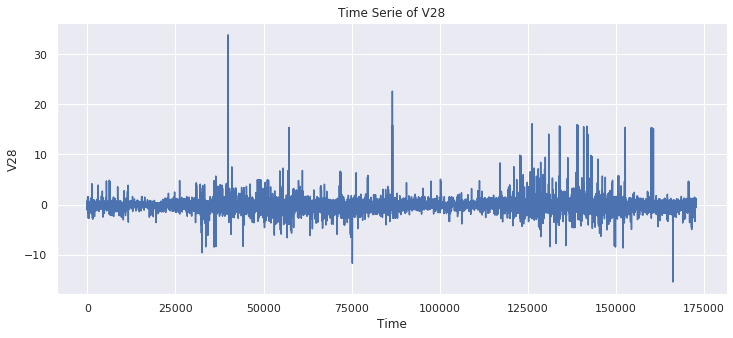

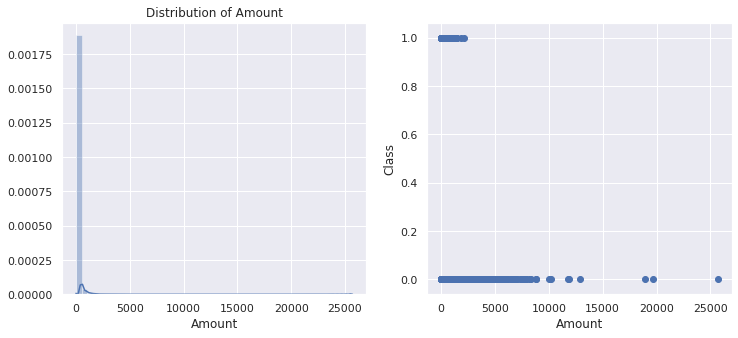

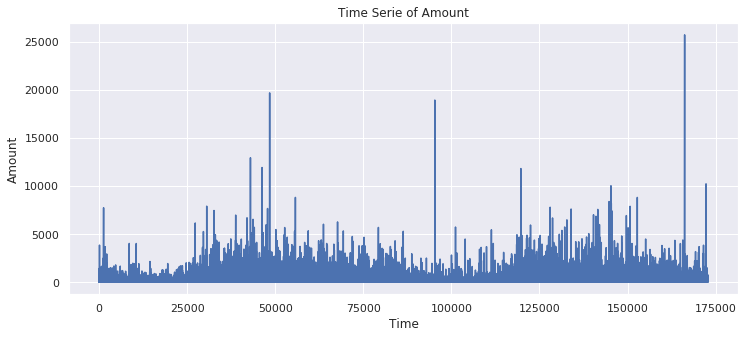

In [8]:
cols=list(data.columns)
cols.remove('Time')
cols.remove('Class')
for f in cols:
    plt.rcParams['figure.figsize'] = 12, 5
    plt.subplot(1,2,1)
    sns.distplot(data[f])
    plt.title(f'Distribution of {f}')
    plt.subplot(1,2,2)
    plt.scatter(data[f],data.Class)
    plt.xlabel(f)
    plt.ylabel("Class")
    plt.show()
    plt.subplot(1,1,1)
    plt.plot(data.Time,data[f])
    plt.xlabel("Time")
    plt.ylabel(f)
    plt.title(f'Time Serie of {f}')
    plt.show()

It's look that **Logistic regression** may be a good choice here!!

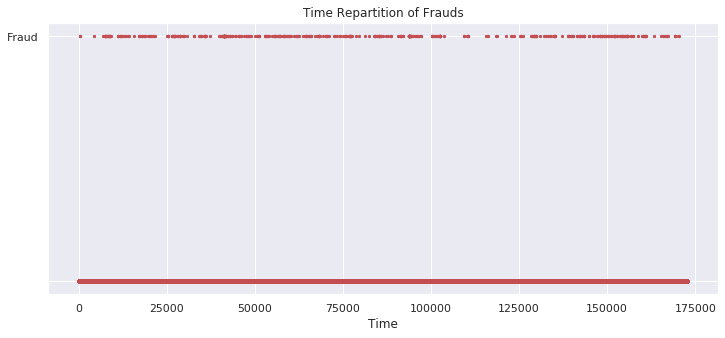

In [9]:
plt.scatter(data.Time,data.Class.replace({0:"",1:"Fraud"}),s=5,c='r')
plt.title(f'Time Repartition of Frauds')
plt.xlabel("Time")
plt.show()

Frauds occures all the time

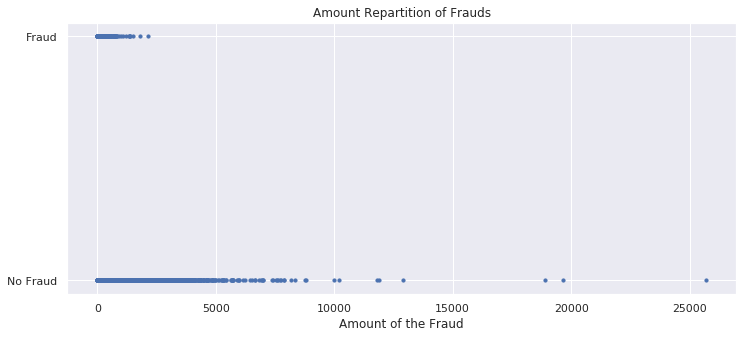

In [10]:
plt.scatter(data.Amount,data.Class.replace({0:"No Fraud",1:"Fraud"}),s=10)
plt.title(f'Amount Repartition of Frauds')
plt.xlabel("Amount of the Fraud")
plt.show()

Credit Card Frauds uses small amounts of money (perhaps to not be detected)

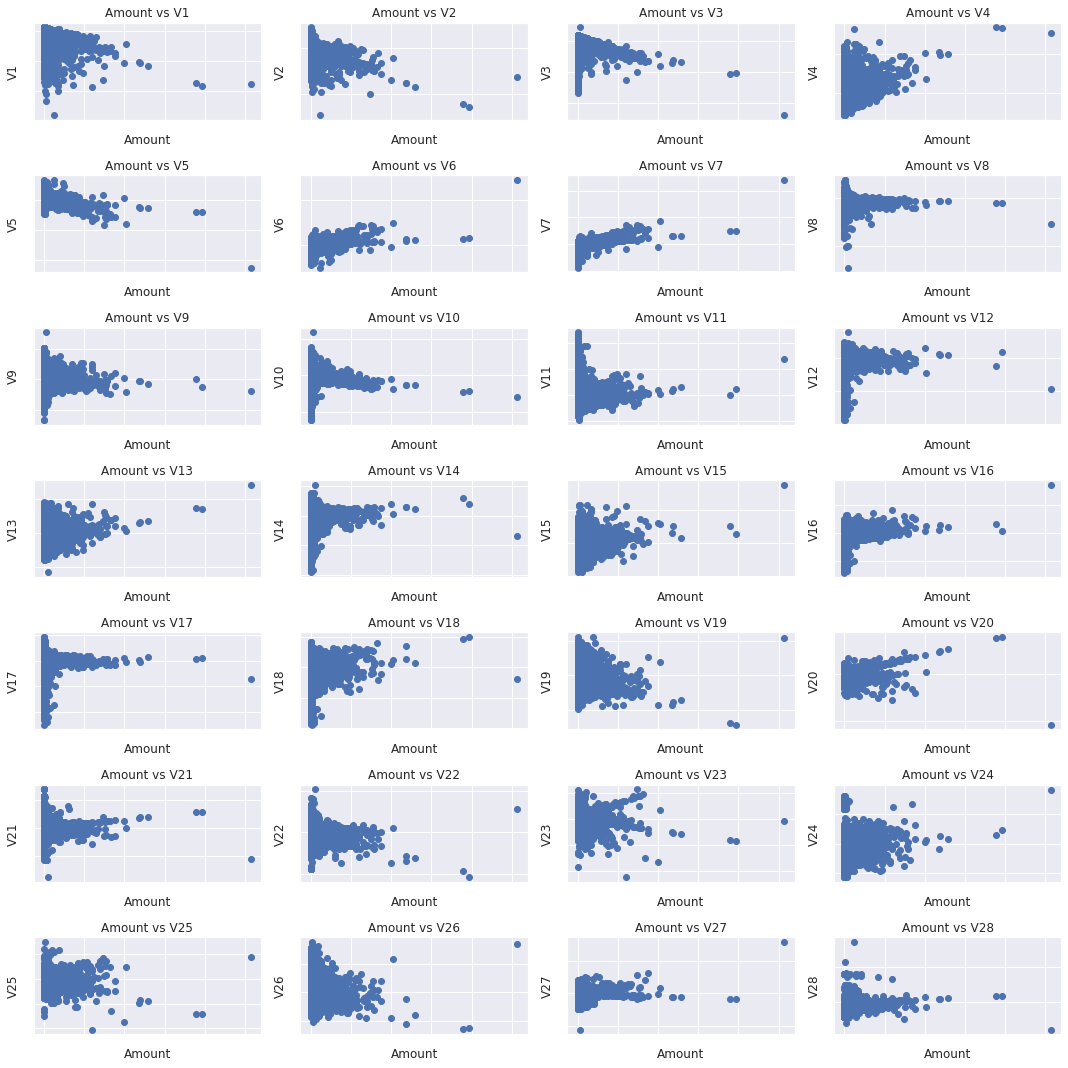

In [11]:
c=cols.copy()
c.remove("Amount")

#plt.rcParams['figure.figsize'] = 15, 15
fig, axes = plt.subplots(7,4,figsize=(15,15))
for i,f in enumerate(c):
    
    #plt.subplot(7,4,i+1)
    axes[int(i/4),i%4].scatter(data.Amount,data[f])
    axes[int(i/4),i%4].set_title(f'Amount vs {f}')
    axes[int(i/4),i%4].set_ylabel(f)
    axes[int(i/4),i%4].set_xticklabels([])
    axes[int(i/4),i%4].set_yticklabels([])
    axes[int(i/4),i%4].set_xlabel("Amount")
    
plt.tight_layout()
plt.show()

The amount feature May have some linear correlation with other featues => It may cause some problem for Linear model estimation

# Feature Selection using Lasso Regreession

In [12]:
X=data[cols]
Y=data.Class
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [13]:
scaler=RobustScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

## Testing for auto-collinearity

The **Durbin-Watson** test : 0 <DW<4 where: 2 indicate no autocorrelation , 0<DW<1 cause alarm, 3<DW<4 cause alarm

In [14]:
dw=pd.DataFrame(durbin_watson(x_train),index=cols,columns=['The Durbin-Watson test statistics'])
dw["Passed"]=dw.apply(lambda row: 'Ok' if row[0]<=3 and row[0]>=1 else "Warning!",axis=1)
dw

,The Durbin-Watson test statistics,Passed
V1,2.00528,Ok
V2,1.98895,Ok
V3,1.97955,Ok
V4,1.99596,Ok
V5,1.99716,Ok
V6,1.91862,Ok
V7,2.00267,Ok
V8,2.00137,Ok
V9,1.99554,Ok
V10,1.98669,Ok


## Reducing the dimentiallity of the problem

In [15]:
def select_feature_F(data,columns,target):
    F,P_F=f_regression(data,target)
    
    cols=pd.DataFrame(np.array(columns),columns=['Xi'])
    F=pd.DataFrame(np.array(F),columns=['F Statistic'])
    P_F=pd.DataFrame(np.array(P_F),columns=['P-values {Prob(F Statistic)}'])
   
    df=pd.concat([cols,F,P_F], axis=1)
    
    
    return df.sort_values(by='F Statistic',ascending=False).reset_index(drop=True)

select_feature_F(x_train,cols,y_train)

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,V17,30950.89390,0.00000
1,V14,24096.58620,0.00000
2,V12,17679.28989,0.00000
3,V10,12111.53091,0.00000
4,V16,10023.93763,0.00000
5,V3,9644.30994,0.00000
6,V7,9027.66871,0.00000
7,V11,5921.44341,0.00000
8,V4,4363.78959,0.00000
9,V18,3253.37640,0.00000


Some features are not significant according to the F-statistic test (F Statistic < 1  and P-values > 0.05)

In [16]:
n_alphas = 200
alphas = np.linspace(0, 1, n_alphas)
lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(x_train, y_train)
sel_feats=[x for i,x in enumerate(cols) if lasso_cv.coef_[i]!=0]
sel_feats

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [17]:
lasso_cv.alpha_

0.0

In [18]:
lasso_cv.coef_

array([-4.42658231e-03,  3.90020759e-03, -9.87783375e-03,  6.10288397e-03,
       -3.29062315e-03, -1.88577662e-03, -7.66661790e-03,  4.98405027e-04,
       -4.58306355e-03, -8.11177228e-03,  9.50980042e-03, -1.12272362e-02,
       -2.53127284e-04, -1.21603425e-02, -2.63259358e-04, -9.38422853e-03,
       -1.44842909e-02, -5.72972914e-03,  1.80372579e-03,  1.75886951e-04,
        8.91569806e-04,  1.36666542e-04,  8.30135502e-05, -4.35529407e-04,
        3.18079018e-04,  2.23703553e-04,  3.19301578e-04,  1.47487853e-04,
        4.22783926e-04])

Lasso  did not removed any variables from the model

## Testing for multi-collinearity

using the Variance Inflation Factor: when VIF=1 : no multicollinearity. 1<VIF<5: perfectly ok .  VIF>10 : input Variable must be treated with precaution because of collinearity

In [19]:
VIF=pd.DataFrame()
VIF['feature']=sel_feats
VIF['VIF']=[variance_inflation_factor(pd.DataFrame(x_train,columns=cols)[sel_feats].values, i) for i in range(len(sel_feats))]
VIF['Passed']= VIF.apply(lambda row: 'Ok' if row[1]>=1 and row[1]<=5 else 'Warning!!', axis=1)
VIF

,feature,VIF,Passed
0,V1,1.49255,Ok
1,V2,3.69936,Ok
2,V3,1.49658,Ok
3,V4,1.09602,Ok
4,V5,2.33719,Ok
5,V6,1.59359,Ok
6,V7,2.43703,Ok
7,V8,1.10585,Ok
8,V9,1.01212,Ok
9,V10,1.07037,Ok


In [20]:
df=pd.DataFrame(x_train,columns=cols)
select_feature_F(df[sel_feats],sel_feats,y_train)

,Xi,F Statistic,P-values {Prob(F Statistic)}
0,V17,30950.89390,0.00000
1,V14,24096.58620,0.00000
2,V12,17679.28989,0.00000
3,V10,12111.53091,0.00000
4,V16,10023.93763,0.00000
5,V3,9644.30994,0.00000
6,V7,9027.66871,0.00000
7,V11,5921.44341,0.00000
8,V4,4363.78959,0.00000
9,V18,3253.37640,0.00000


The selected features are significant according to the F-statistic test

In [21]:
x_train=pd.DataFrame(x_train,columns=cols)[sel_feats]
x_test=pd.DataFrame(x_test,columns=cols)[sel_feats]
x_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.89746,-0.35168,-0.45491,-0.11244,-0.08257,0.47844,-0.63667,0.31778,0.94866,0.05571,0.22801,0.71765,0.00212,0.07131,0.03146,0.56613,-1.05549,0.48597,0.62582,-0.31505,-0.39968,-0.45276,1.13714,0.02295,-0.67011,-0.42936,-0.00760,-0.44221,-0.29511
1,-0.07298,0.47958,0.18805,0.57459,0.31154,0.31169,0.52144,-0.13314,-0.54850,0.39481,0.36816,-0.09483,-0.51701,0.64898,0.38849,-1.17587,0.65482,0.24756,3.65574,0.78037,-0.22861,-0.25257,-0.32180,-0.59859,-0.78711,1.35769,-0.04645,1.02634,0.19655
2,-1.35729,-1.41496,0.54557,0.46716,0.87896,0.06733,-0.44792,1.67614,-0.45144,-0.88283,0.75953,0.86513,-0.35198,0.64285,-0.38841,-0.70448,0.79406,-0.71388,-0.04713,2.62334,0.73437,-0.30489,0.72437,-0.39019,0.33739,0.65234,-0.62879,-2.86426,2.19558
3,0.82061,-0.76393,-0.87617,-0.12456,-0.39419,-0.82178,0.18494,-1.04918,-0.61364,0.88786,-0.50007,0.52136,1.09785,-0.00712,-0.29004,-1.88922,0.06132,0.38059,-0.72273,-0.38795,-0.90992,-0.84638,0.48011,0.04401,-0.38985,0.89342,-0.58769,-0.32458,2.21101
4,0.99325,-0.43887,-0.83801,-0.56637,-0.26625,-0.99807,-0.14300,-0.88063,-0.53615,0.95482,-0.30910,-0.56914,0.25676,0.08165,0.17763,0.74196,0.33032,-1.86058,0.67585,0.04991,0.19290,0.11105,0.73291,-0.15298,-0.11999,-0.44720,-0.27157,-0.57100,-0.19183


# Creating a model using Logistic Regression

In [22]:
model=LogisticRegression(random_state=0).fit(x_train, y_train)
y_hat=model.predict(x_test)

In [23]:
print("Mean Training Accuracy = {:.5f}".format(model.score(x_train,y_train)))
print("Mean Testing Accuracy = {:.5f}".format(model.score(x_test,y_test)))

Mean Training Accuracy = 0.99933
Mean Testing Accuracy = 0.99902


The Model is stable (not overfitted) 

In [24]:
y_pred_prob_LR = model.predict_proba(x_test)[:, 1]
fpr_LR, tpr_LR, thresholds_LR = metrics.roc_curve(y_test, y_pred_prob_LR)

In [25]:
auc_LR=metrics.roc_auc_score(y_test, y_pred_prob_LR)
print("Performance of the logistic classifier = {:.2f}".format(auc_LR))

Performance of the logistic classifier = 0.97


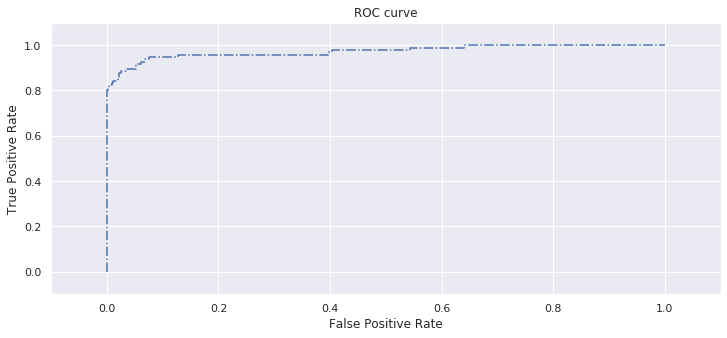

In [26]:
plt.plot(fpr_LR, tpr_LR, '-.', label='AUC LR = %0.2f' % auc_LR)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Trying LogisitcRegression with a Polynomial fit 

In [52]:
from sklearn.preprocessing import PolynomialFeatures

In [54]:
poly= PolynomialFeatures(degree=2)
cols=[str(x) for x in range(465)]
poly.fit(x_train)
X_train = pd.DataFrame(poly.transform(x_train),columns=cols)
X_test = pd.DataFrame(poly.transform(x_test),columns=cols)
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464
0,1.00000,0.89746,-0.35168,-0.45491,-0.11244,-0.08257,0.47844,-0.63667,0.31778,0.94866,0.05571,0.22801,0.71765,0.00212,0.07131,0.03146,0.56613,-1.05549,0.48597,0.62582,-0.31505,-0.39968,-0.45276,1.13714,0.02295,-0.67011,-0.42936,-0.00760,-0.44221,-0.29511,0.80543,-0.31562,-0.40826,-0.10091,-0.07410,0.42938,-0.57138,0.28519,0.85138,0.04999,0.20463,0.64406,0.00191,0.06400,0.02824,0.50808,-0.94725,0.43614,0.56164,-0.28274,-0.35870,-0.40634,1.02053,0.02060,-0.60140,-0.38534,-0.00682,-0.39687,-0.26485,0.12368,0.15998,0.03954,0.02904,-0.16826,0.22391,-0.11176,-0.33363,-0.01959,-0.08019,-0.25238,-0.00075,-0.02508,-0.01107,-0.19910,0.37120,-0.17091,-0.22009,0.11080,0.14056,0.15923,-0.39991,-0.00807,0.23567,0.15100,0.00267,0.15552,0.10378,0.20694,0.05115,0.03756,-0.21765,0.28963,-0.14456,-0.43155,-0.02534,-0.10372,-0.32646,-0.00097,-0.03244,-0.01431,-0.25754,0.48015,-0.22107,-0.28469,0.14332,0.18182,0.20597,-0.51729,-0.01044,0.30484,0.19532,0.00346,0.20117,0.13425,0.01264,0.00928,-0.05379,0.07159,-0.03573,-0.10666,-0.00626,-0.02564,-0.08069,-0.00024,-0.00802,-0.00354,-0.06365,0.11868,-0.05464,-0.07037,0.03542,0.04494,0.05091,-0.12786,-0.00258,0.07535,0.04828,0.00086,0.04972,0.03318,0.00682,-0.03950,0.05257,-0.02624,-0.07833,-0.00460,-0.01883,-0.05925,-0.00018,-0.00589,-0.00260,-0.04674,0.08715,-0.04013,-0.05167,0.02601,0.03300,0.03738,-0.09389,-0.00189,0.05533,0.03545,0.00063,0.03651,0.02437,0.22891,-0.30461,0.15204,0.45388,0.02665,0.10909,0.34335,0.00102,0.03412,0.01505,0.27086,-0.50499,0.23251,0.29942,-0.15073,-0.19123,-0.21662,0.54405,0.01098,-0.32061,-0.20543,-0.00364,-0.21157,-0.14119,0.40535,-0.20232,-0.60398,-0.03547,-0.14517,-0.45690,-0.00135,-0.04540,-0.02003,-0.36044,0.67200,-0.30940,-0.39844,0.20058,0.25447,0.28826,-0.72398,-0.01461,0.42664,0.27336,0.00484,0.28154,0.18789,0.10098,0.30146,0.01770,0.07246,0.22805,0.00067,0.02266,0.01000,0.17990,-0.33541,0.15443,0.19887,-0.10012,-0.12701,-0.14388,0.36136,0.00729,-0.21295,-0.13644,-0.00242,-0.14053,-0.09378,0.89995,0.05285,0.21631,0.68080,0.00201,0.06765,0.02985,0.53706,-1.00129,0.46102,0.59368,-0.29887,-0.37916,-0.42952,1.07875,0.02177,-0.63570,-0.40732,-0.00721,-0.41951,-0.27996,0.00310,0.01270,0.03998,0.00012,0.00397,0.00175,0.03154,-0.05880,0.02707,0.03486,-

In [63]:
n_alphas = 200
alphas = np.linspace(0, 1, n_alphas)
lasso_cv2 = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv2.fit(X_train, y_train)


NameError: name 'x' is not defined

In [66]:
sel_feats2=[str(i) for i in range(465) if lasso_cv2.coef_[i]!=0]
print(f'{len(sel_feats2)} features are selected from a total of 465 features')

464 features are selected from a total of 465 features


In [67]:
model2=LogisticRegression(random_state=0).fit(X_train[sel_feats2], y_train)
y_hat2=model2.predict(X_test[sel_feats2])
print("Mean Training Accuracy = {:.5f}".format(model2.score(X_train[sel_feats2],y_train)))
print("Mean Testing Accuracy = {:.5f}".format(model2.score(X_test[sel_feats2],y_test)))

Mean Training Accuracy = 0.99954
Mean Testing Accuracy = 0.99898


In [68]:
y_pred_prob_LR2 = model2.predict_proba(X_test[sel_feats2])[:, 1]
fpr_LR2, tpr_LR2, thresholds_LR2 = metrics.roc_curve(y_test, y_pred_prob_LR2)
auc_LR2=metrics.roc_auc_score(y_test, y_pred_prob_LR2)
print("Performance of the logistic classifier = {:.2f}".format(auc_LR2))

Performance of the logistic classifier = 0.88


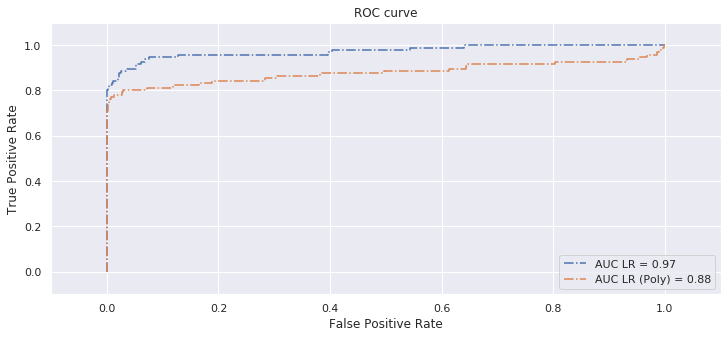

In [69]:
plt.plot(fpr_LR, tpr_LR, '-.', label='AUC LR = %0.2f' % auc_LR)
plt.plot(fpr_LR2, tpr_LR2, '-.', label='AUC LR (Poly) = %0.2f' % auc_LR2)
plt.xlim([-0.1, 1.1])

plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)

# Creating a model using Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Calculate Decision Trees best parameters using GridSearch

In [50]:
tree_params = {'max_depth': range(3,10),
               'max_features': range(20,29),
               'max_leaf_nodes': range(5,10),
               'min_samples_leaf': range(2,7)}

tree_grid = GridSearchCV(DecisionTreeClassifier(criterion='gini', random_state=17), tree_params,
                         cv=3, n_jobs=-1, verbose=True)

tree_grid.fit(x_train, y_train)

Fitting 3 folds for each of 1575 candidates, totalling 4725 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 34.8min
[Parallel(n_jobs=-1)]: Done 4725 out of 4725 | elapsed: 40.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=17,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 10),
                         'max_

In [51]:
tree_grid.best_params_

{'max_depth': 5,
 'max_features': 23,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5}

best tree parameters :
- max_depth: 5
- max_features: 23
- max_leaf_nodes: 9
- min_samples_leaf: 5

In [70]:
clf=RandomForestClassifier(n_estimators=50, **tree_grid.best_params_)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=23,
                       max_leaf_nodes=9, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
print(f'Mean Training Accuracy Score: {clf.score(x_train,y_train):.5f}')
print(f'Test Training Accuracy Score: {clf.score(x_test,y_test):.5f}')

Mean Training Accuracy Score: 0.99954
Test Training Accuracy Score: 0.99914


In [77]:
y_pred_prob_RF=clf.predict_proba(x_test)[:, 1]
print("Performance of the Random Forest classifier = {:.3f}".format(metrics.roc_auc_score(y_test, y_pred_prob_RF)))

Performance of the Random Forest classifier = 0.901


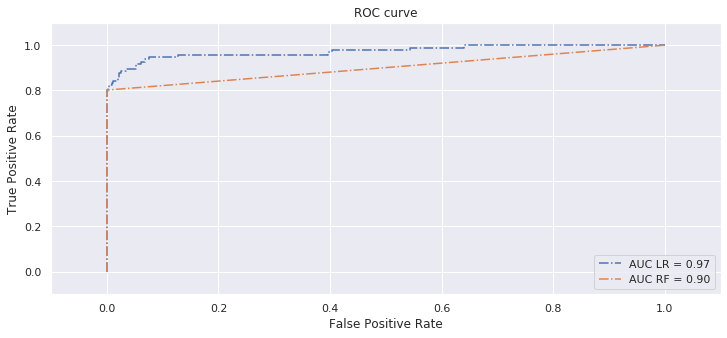

In [84]:
fpr_RF, tpr_RF, thresholds_RF = metrics.roc_curve(y_test, y_pred_prob_RF)
auc_RF=metrics.roc_auc_score(y_test, y_pred_prob_RF)
plt.plot(fpr_LR, tpr_LR, '-.', label='AUC LR = %0.2f' % auc_LR)
plt.plot(fpr_RF, tpr_RF, '-.', label='AUC RF = %0.2f' % auc_RF)

plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# Creating a model using KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

## Calculating KNN best parameters

In [93]:
grid_params= {
    'n_neighbors' : range(1,5),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']    
}
gs= GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 3,
    verbose = True,
    n_jobs= -1
)
gs.fit(x_train,y_train)
gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 66.3min finished


{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

best paameters are :
- metric: manhattan
- n_neighbors: 4
- weights: distance

In [94]:
neigh = KNeighborsClassifier(**gs.best_params_)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [95]:
y_pred_proba_KNN = neigh.predict_proba(x_test)

In [96]:
fpr_KNN, tpr_KNN, thresholds_KNN = metrics.roc_curve(y_test, y_pred_proba_KNN[:, 1])

In [97]:
#print("Mean Training Accuracy = {:.5f}".format(neigh.score(x_train,y_train)))
print("Mean Testing Accuracy = {:.5f}".format(neigh.score(x_test,y_test)))

Mean Testing Accuracy = 0.99940


In [106]:
auc_KNN=metrics.roc_auc_score(y_test, y_pred_proba_KNN[:, 1])

In [108]:
print("Performance of the KNN classifier = {:.2f}".format(auc_KNN))

Performance of the KNN classifier = 0.90


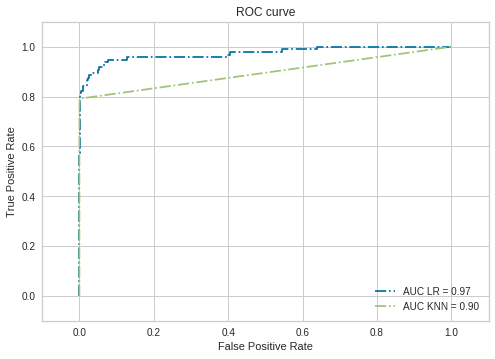

In [110]:
plt.plot(fpr_LR, tpr_LR, '-.',label='AUC LR = %0.2f' % auc_LR)
plt.plot(fpr_KNN, tpr_KNN, '-.',label='AUC KNN = %0.2f' % auc_KNN)
plt.legend()
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)